Iteration no: 0 Error: 13.89275138870801
Iteration no: 1 Error: 13.328692808059689
Iteration no: 2 Error: 13.1233066246321
Iteration no: 3 Error: 13.034582087480153
Iteration no: 4 Error: 12.983227794490372
Iteration no: 5 Error: 12.93367629070885
Iteration no: 6 Error: 12.875933115088028
Iteration no: 7 Error: 12.816562931736327
Iteration no: 8 Error: 12.767151109946882
Iteration no: 9 Error: 12.720603562593913
Iteration no: 10 Error: 12.68088966417506
Iteration no: 11 Error: 12.642245976071205
Iteration no: 12 Error: 12.599481943303926
Iteration no: 13 Error: 12.551401215661455
Iteration no: 14 Error: 12.511858789346679
Iteration no: 15 Error: 12.486356209991003
Iteration no: 16 Error: 12.466181265682264
Iteration no: 17 Error: 12.451005458969648
Iteration no: 18 Error: 12.441774514286925
Iteration no: 19 Error: 12.43661570515305
Iteration no: 20 Error: 12.431667221371725
Iteration no: 21 Error: 12.426945942833568
Iteration no: 22 Error: 12.424326446608193
Iteration no: 23 Error: 12.

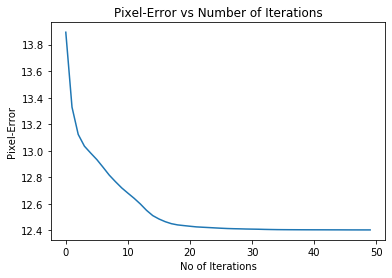

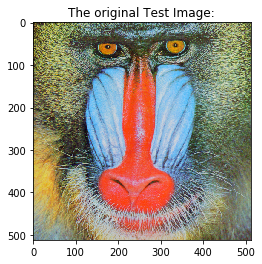

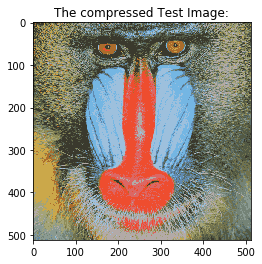

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from sklearn.metrics import pairwise_distances  # Don't use other functions in sklearn
%matplotlib inline

###Measure the pixel error at each iteration.???????????????????????????????

def train_kmeans(train_data, initial_centroids):
  ##### TODO: Implement here!! #####
  # Hint: pairwise_distances() might be useful
  N=train_data.shape[0]
  K=initial_centroids.shape[0]
    
  #size of rnk 
  R=np.zeros((N,K))

  states = {
      'centroids': initial_centroids
  }
  
 #E- step
 #pairwise_distances(train_data,states['centroids'])
  kindex=np.argmin(pairwise_distances(train_data,states['centroids']),axis=1)
  #R[:,kindex[:]]=1
  for n in range(N):
     R[n,kindex[n]]=1
 #Update M step

  for k in range(K):
    r=R[:,k].reshape(1,N)
    states['centroids'][k]=np.dot(r,train_data)/np.sum(r) 

  #error= calculate_error(train_data, states['centroids'])
  #print(calculate_error(train_data, states['centroids']))
  #print(states)
  
  
  return states



#After training, read the test image mandrill-large.tiff, and 
#replace each pixel’s (r,g,b) values with the value of the closest cluster centroid. 
#Display the new image, and measure the pixel error using provided calculate error function.

def test_kmeans(states, test_data):
  result = {}
  ##### TODO: Implement here!! #####
  N=test_data.shape[0]
  K=states['centroids'].shape[0]
  compressed_data = np.zeros(test_data.shape) # TODO: modify here!

  for n in range(N):
        index=np.argmin(pairwise_distances(test_data[n].reshape(1,-1),states['centroids']))
        compressed_data[n]=states['centroids'][index]

  
  ##### TODO: Implement here!! #####
  #result['pixel-error'] = calculate_error(test_data, compressed_data)
  result = calculate_error(test_data, compressed_data)
  return result, compressed_data

### DO NOT CHANGE ###
def calculate_error(data, compressed_data):
  assert data.shape == compressed_data.shape
  error = np.sqrt(np.mean(np.power(data - compressed_data, 2)))
  return error
### DO NOT CHANGE ###

# Load data
img_small = np.array(imageio.imread('q1data/mandrill-small.tiff')) # 128 x 128 x 3
img_large = np.array(imageio.imread('q1data/mandrill-large.tiff')) # 512 x 512 x 3

ndim = img_small.shape[-1]

train_data = img_small.reshape(-1, ndim).astype(float)
test_data = img_large.reshape(-1, ndim).astype(float)

# K-means
num_centroid = 16
initial_centroid_indices = [16041, 15086, 15419,  3018,  5894,  6755, 15296, 11460, 
                            10117, 11603, 11095,  6257, 16220, 10027, 11401, 13404]
initial_centroids = train_data[initial_centroid_indices, :]

num=0
error=np.zeros((50,))
while(num<50):
    states = train_kmeans(train_data, initial_centroids) 
    error[num],_=test_kmeans(states, train_data)
    print("Iteration no:",num,"Error:",error[num])
    num=num+1
test=test_kmeans(states,train_data)
plt.title("Pixel-Error vs Number of Iterations")
plt.xlabel("No of Iterations")
plt.ylabel("Pixel-Error")
plt.plot(np.arange(50),error)


result_kmeans,compressed = test_kmeans(states, test_data)
print('\nKmeans result for test image=', result_kmeans)

plt.figure()
plt.title("The original Test Image:")
plt.imshow(np.uint8(test_data.reshape(img_large.shape[0],img_large.shape[1],ndim)))


plt.figure()
plt.title("The compressed Test Image:")
plt.imshow(np.uint8(compressed.reshape(img_large.shape[0],img_large.shape[1],ndim)))


   

log likelihood for iteration  0  = [-15.8008619  -15.26365448 -15.11621598 ... -14.88014039 -14.91445209
 -15.27053319]
log likelihood for iteration  1  = [-15.28070475 -14.16777356 -13.51156834 ... -13.47823961 -13.44061938
 -13.76075629]
log likelihood for iteration  2  = [-15.74719392 -14.56427955 -13.46228177 ... -13.66854325 -13.53505309
 -13.8097295 ]
log likelihood for iteration  3  = [-15.89494215 -15.00540703 -13.57655934 ... -13.91497859 -13.71226762
 -13.94426721]
log likelihood for iteration  4  = [-15.95523175 -15.333985   -13.69763074 ... -14.10294364 -13.85472875
 -14.05003043]
log likelihood for iteration  5  = [-16.04647833 -15.5310321  -13.77249143 ... -14.21323055 -13.94955945
 -14.14016196]
log likelihood for iteration  6  = [-16.11988212 -15.63964934 -13.80742358 ... -14.26312113 -14.00395083
 -14.21136899]
log likelihood for iteration  7  = [-16.1590556  -15.70188279 -13.82299718 ... -14.28499159 -14.03638023
 -14.2639838 ]
log likelihood for iteration 

C:\Users\Elsa\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\Users\Elsa\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply


 8  = [-16.17349331 -15.7431558  -13.83192109 ... -14.29959074 -14.06044106
 -14.30217811]
log likelihood for iteration  9  = [-16.17357529 -15.77546354 -13.83924233 ... -14.31545787 -14.08279929
 -14.33050704]
log likelihood for iteration  10  = [-16.16521296 -15.80379517 -13.84657407 ... -14.33432696 -14.10550833
 -14.35206138]
log likelihood for iteration  11  = [-16.15154253 -15.83019196 -13.85435877 ... -14.35557387 -14.12872312
 -14.36873101]
log likelihood for iteration  12  = [-16.13431698 -15.85547739 -13.86266815 ... -14.37823342 -14.15212797
 -14.38173921]
log likelihood for iteration  13  = [-16.11458861 -15.87994946 -13.87146831 ... -14.40157632 -14.17541806
 -14.39192486]
log likelihood for iteration  14  = [-16.09303517 -15.90366656 -13.88070281 ... -14.42515948 -14.19839817
 -14.39987691]
log likelihood for iteration  15  = [-16.07012902 -15.92657735 -13.89031686 ... -14.44874907 -14.22096907
 -14.40601279]
log likelihood for iteration  16  = [-16.04622896 -15.94858466 

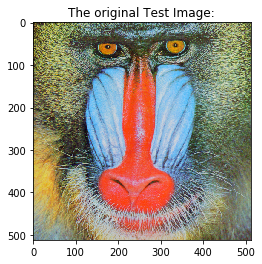

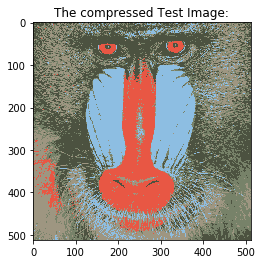

In [6]:
from scipy.stats import multivariate_normal  # Don't use other functions in scipy

def train_gmm(train_data, init_pi, init_mu, init_sigma):
  ##### TODO: Implement here!! #####
  # Hint: multivariate_normal() might be useful
  K=init_pi.shape[0]
  N=train_data.shape[0]
  states = {
      'pi': init_pi,
      'mu': init_mu,
      'sigma': init_sigma,
  }
  ##### TODO: Implement here!! #####
    

  normal_dist=np.zeros((N,K))
  gamma=np.zeros((N,K))

  for k in range(K):
     normal_dist[:,k]=multivariate_normal.pdf(train_data,mean=states['mu'][k],cov=states['sigma'][k])

    #normal_dist -(N,K)

  den=(np.dot(normal_dist,states['pi'])).reshape((-1,)) #output size=(N,1)
    #print(den.shape)=>(N,)

  for k in range(K):
        #print(normal_dist[:,k].shape)
        #print(den.shape) 
    gamma[:,k]=(states['pi'][k]*normal_dist[:,k])/den

    #print(gamma.shape)  ==> (N,K)

    #M step:
    #Nk= number of points in cluster k
    Nk=np.sum(gamma[:,k])
    states['pi'][k]=Nk/N
    #states['mu'][k]
    
    states['mu'][k]=(1/Nk)*np.sum(np.multiply(train_data,gamma[:,k].reshape(-1,1)),axis=0)
    #print(trial.shape)  each(1,3)  to get (K,3)==> gamma[1,k]*x(1)+ gamma[2,k]*x(2)+....
    diff=train_data-states['mu'][k].reshape(1,-1)
    prod_trans=np.transpose(np.multiply(diff,gamma[:,k].reshape(-1,1)))  #+==(3,N)
    states['sigma'][k]=(1/Nk)*np.dot(prod_trans,diff)   #===> shape(3,3)
    
    l=0
    for k in range(K):
        l=l+np.multiply(gamma[:,k],np.log(states['pi'][k]*normal_dist[:,k]))
    
  
  return states,l

def test_gmm(states, test_data):
  result = {}
  ##### TODO: Implement here!! #####
  compressed_data = test_data

  N=test_data.shape[0]
  K=states['pi'].shape[0]
  compressed_data = np.zeros(test_data.shape) # TODO: modify here!

  for n in range(N):
        index=np.argmin(pairwise_distances(test_data[n].reshape(1,-1),states['mu']))
        compressed_data[n]=states['mu'][index]

  ##### TODO: Implement here!! #####
  result['pixel-error'] = calculate_error(test_data, compressed_data)
  return result,compressed_data

# GMM
num_centroid = 5
init_pi = np.ones((num_centroid, 1)) / num_centroid
init_mu = initial_centroids[:num_centroid, :]
init_sigma = np.tile(np.identity(ndim), [num_centroid, 1, 1])*1000.
num=0
K=init_pi.shape[0]
while num<=50:
    states,l = train_gmm(train_data, init_pi, init_mu, init_sigma)

    print("log likelihood for iteration ",num," =",l)
    num=num+1
result_gmm,compressed = test_gmm(states, test_data)
print('\nGMM result=', result_gmm)
print("\nCovariance matrix",states['sigma'])
print("\nMean",states['mu'])
print("\npi",states['pi'])




plt.figure()
plt.title("The original Test Image:")
plt.imshow(np.uint8(test_data.reshape(img_large.shape[0],img_large.shape[1],ndim)))


plt.figure()
plt.title("The compressed Test Image:")
plt.imshow(np.uint8(compressed.reshape(img_large.shape[0],img_large.shape[1],ndim)))